In [ ]:
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ROOT = Path.cwd().resolve()
if (ROOT / "src" / "sentiment").exists():
    pass
elif (ROOT.parent / "src" / "sentiment").exists():
    ROOT = ROOT.parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.utils import DATA_CLEANED, load_jsonl
pd.set_option("display.max_colwidth", None)

In [3]:
path = DATA_CLEANED / "processed_master_orig.jsonl"
rows = load_jsonl(path)
df = pd.DataFrame(rows)
df.head()

,posted_at,fetched_at,headline,url,source,reporter,ticker,is_ai_related,is_proxy_partnership,sentiment_vader,sentiment_llm_phi3,sentiment_llm_llama3_2,sentiment_llm_deepseek_r1
0,2026-02-26T14:00:00Z,2026-02-26T15:43:31Z,Figma partners with OpenAI to bake in support for Codex,https://techcrunch.com/2026/02/26/figma-partners-with-openai-to-bake-in-support-for-codex/,TechCrunch,TechCrunch,AAPL,True,True,0.4019,0.6,0.3,0.0
1,2026-02-26T14:00:00Z,2026-02-26T15:43:31Z,Figma partners with OpenAI to bake in support for Codex,https://techcrunch.com/2026/02/26/figma-partners-with-openai-to-bake-in-support-for-codex/,TechCrunch,TechCrunch,MSFT,True,True,0.4019,0.6,0.3,0.0
2,2026-02-26T14:00:00Z,2026-02-26T15:43:31Z,Figma partners with OpenAI to bake in support for Codex,https://techcrunch.com/2026/02/26/figma-partners-with-openai-to-bake-in-support-for-codex/,TechCrunch,TechCrunch,NVDA,True,True,0.4019,0.6,0.3,0.0
3,2026-02-26T12:00:00Z,2026-02-26T15:43:31Z,Instagram now alerts parents if their teen searches for suicide or self-harm content,https://techcrunch.com/2026/02/26/instagram-now-alerts-parents-if-their-teen-searches-for-suicide-or-self-harm-content/,TechCrunch,TechCrunch,META,False,False,-0.6705,-0.6,-0.8,-0.5
4,2026-02-25T23:49:19Z,2026-02-26T15:43:31Z,Anthropic acquires computer-use AI startup Vercept after Meta poached one of its founders,https://techcrunch.com/2026/02/25/anthropic-acquires-vercept-ai-startup-agents-computer-use-founders-investors/,TechCrunch,TechCrunch,AMZN,True,True,0.0000,-0.3,-0.8,0.5


In [6]:
df.dtypes


posted_at                        str
fetched_at                       str
headline                         str
url                              str
source                           str
reporter                         str
ticker                           str
is_ai_related                   bool
is_proxy_partnership            bool
sentiment_vader              float64
sentiment_llm_phi3           float64
sentiment_llm_llama3_2       float64
sentiment_llm_deepseek_r1    float64
dtype: object

In [26]:
df['phi_delta'] = df['sentiment_llm_phi3'] - df['sentiment_vader']
df['llama_delta'] = df['sentiment_llm_llama3_2'] - df['sentiment_vader']
df['deepseek_delta'] = df['sentiment_llm_deepseek_r1'] - df['sentiment_vader']
df['delta_sum'] = abs(df['phi_delta']) + abs(df['llama_delta']) + abs(df['deepseek_delta'])
df.head()


,posted_at,fetched_at,headline,url,source,reporter,ticker,is_ai_related,is_proxy_partnership,sentiment_vader,sentiment_llm_phi3,sentiment_llm_llama3_2,sentiment_llm_deepseek_r1,phi_delta,llama_delta,deepseek_delta,delta_sum
0,2026-02-26T14:00:00Z,2026-02-26T15:43:31Z,Figma partners with OpenAI to bake in support for Codex,https://techcrunch.com/2026/02/26/figma-partners-with-openai-to-bake-in-support-for-codex/,TechCrunch,TechCrunch,AAPL,True,True,0.4019,0.6,0.3,0.0,0.1981,-0.1019,-0.4019,0.7019
1,2026-02-26T14:00:00Z,2026-02-26T15:43:31Z,Figma partners with OpenAI to bake in support for Codex,https://techcrunch.com/2026/02/26/figma-partners-with-openai-to-bake-in-support-for-codex/,TechCrunch,TechCrunch,MSFT,True,True,0.4019,0.6,0.3,0.0,0.1981,-0.1019,-0.4019,0.7019
2,2026-02-26T14:00:00Z,2026-02-26T15:43:31Z,Figma partners with OpenAI to bake in support for Codex,https://techcrunch.com/2026/02/26/figma-partners-with-openai-to-bake-in-support-for-codex/,TechCrunch,TechCrunch,NVDA,True,True,0.4019,0.6,0.3,0.0,0.1981,-0.1019,-0.4019,0.7019
3,2026-02-26T12:00:00Z,2026-02-26T15:43:31Z,Instagram now alerts parents if their teen searches for suicide or self-harm content,https://techcrunch.com/2026/02/26/instagram-now-alerts-parents-if-their-teen-searches-for-suicide-or-self-harm-content/,TechCrunch,TechCrunch,META,False,False,-0.6705,-0.6,-0.8,-0.5,0.0705,-0.1295,0.1705,0.3705
4,2026-02-25T23:49:19Z,2026-02-26T15:43:31Z,Anthropic acquires computer-use AI startup Vercept after Meta poached one of its founders,https://techcrunch.com/2026/02/25/anthropic-acquires-vercept-ai-startup-agents-computer-use-founders-investors/,TechCrunch,TechCrunch,AMZN,True,True,0.0000,-0.3,-0.8,0.5,-0.3000,-0.8000,0.5000,1.6000


In [7]:
sentiment_cols = [c for c in df.columns if c.startswith("sentiment_")]
print("Sentiment columns:", sentiment_cols)

by_ticker = df.groupby("ticker", as_index=False).agg(
    count=("headline", "count"),
    **{col: (col, "mean") for col in sentiment_cols}
)
by_ticker

Sentiment columns: ['sentiment_vader', 'sentiment_llm_phi3', 'sentiment_llm_llama3_2', 'sentiment_llm_deepseek_r1']


,ticker,count,sentiment_vader,sentiment_llm_phi3,sentiment_llm_llama3_2,sentiment_llm_deepseek_r1
0,AAPL,17,0.062288,0.482353,0.111765,0.261765
1,AMZN,8,-0.008250,-0.243750,-0.387500,-0.200000
2,GOOGL,10,0.143100,0.700000,0.150000,0.410000
3,META,6,-0.249600,-0.300000,-0.333333,0.075000
4,MSFT,21,0.059271,0.104762,-0.057143,0.064286
5,NVDA,14,0.164179,0.353571,0.242857,0.210714
6,TSLA,2,-0.505500,-0.400000,-0.800000,0.350000


## AI-related only

Same summary restricted to rows where `is_ai_related == True`.

In [8]:
df_ai = df[df["is_ai_related"] == True]
by_ticker_ai = df_ai.groupby("ticker", as_index=False).agg(
    count=("headline", "count"),
    **{col: (col, "mean") for col in sentiment_cols}
)
by_ticker_ai

,ticker,count,sentiment_vader,sentiment_llm_phi3,sentiment_llm_llama3_2,sentiment_llm_deepseek_r1
0,AAPL,12,0.033658,0.383333,0.125000,0.170833
1,AMZN,8,-0.008250,-0.243750,-0.387500,-0.200000
2,GOOGL,6,0.192967,0.733333,0.233333,0.300000
3,META,4,-0.127225,-0.150000,-0.100000,0.237500
4,MSFT,21,0.059271,0.104762,-0.057143,0.064286
5,NVDA,14,0.164179,0.353571,0.242857,0.210714
6,TSLA,2,-0.505500,-0.400000,-0.800000,0.350000


In [12]:
plot_df = by_ticker_ai.set_index("ticker")[sentiment_cols]
plot_df.head()

,sentiment_vader,sentiment_llm_phi3,sentiment_llm_llama3_2,sentiment_llm_deepseek_r1
ticker,,,,
AAPL,0.033658,0.383333,0.125000,0.170833
AMZN,-0.008250,-0.243750,-0.387500,-0.200000
GOOGL,0.192967,0.733333,0.233333,0.300000
META,-0.127225,-0.150000,-0.100000,0.237500
MSFT,0.059271,0.104762,-0.057143,0.064286


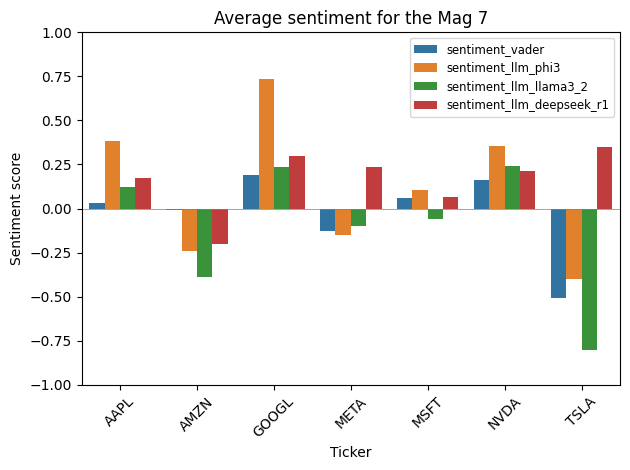

In [38]:
plot_long = by_ticker_ai.melt(
    id_vars="ticker",
    value_vars=sentiment_cols,
    var_name="Sentiment Models",
    value_name="value",
)
sns.barplot(data=plot_long, x="ticker", y="value", hue="Sentiment Models")
plt.axhline(0, color="gray", linewidth=0.5)
plt.ylim(-1, 1)
plt.xticks(rotation=45)
plt.xlabel("Ticker")
plt.ylabel("Sentiment score")
plt.title("Average sentiment for the Mag 7")
plt.legend(loc="upper right", fontsize="small")
plt.tight_layout()
plt.show()

### Inspect raw DeepSeek-R1 responses (contrarian TSLA/META)

Find headlines where DeepSeek's sign disagrees with the other models, then fetch and display the full Ollama response for DeepSeek-R1 to see its reasoning.

In [23]:
import numpy as np
import requests
from src.sentiment.ollama_scorer import SENTIMENT_PROMPT
from src.matching import load_matching_config, build_context_for_headline

OLLAMA_URL = "http://localhost:11434/api/generate"
DEEPSEEK = "deepseek-r1:1.5b"


def fetch_ollama_raw(headline: str, model: str = DEEPSEEK, context: str | None = None, timeout: int = 90) -> str:
    """Send the same prompt as the pipeline to Ollama; return full response text."""
    context_block = f"Context: {context}\n\n" if (context and context.strip()) else ""
    prompt = SENTIMENT_PROMPT.format(CONTEXT=context_block, HEADLINE=headline.strip())
    payload = {"model": model, "prompt": prompt, "stream": False, "options": {"temperature": 0.0}}
    resp = requests.post(OLLAMA_URL, json=payload, timeout=timeout)
    resp.raise_for_status()
    return (resp.json().get("response") or "").strip()


# Restrict to TSLA/META and one row per headline (sentiment is per headline)
other_cols = [c for c in sentiment_cols if c != "sentiment_llm_deepseek_r1"]
subset = df[df["ticker"].isin(["TSLA", "META"])].drop_duplicates(subset="headline", keep="first")
subset = subset.assign(
    other_mean=subset[other_cols].mean(axis=1),
    deepseek=subset["sentiment_llm_deepseek_r1"],
)
subset["sign_other"] = np.sign(subset["other_mean"])
subset["sign_ds"] = np.sign(subset["deepseek"])
contrarian = subset[subset["sign_ds"] != subset["sign_other"]].head(3)

if contrarian.empty:
    print("No contrarian headlines found for TSLA/META (DeepSeek same sign as others).")
else:
    config = load_matching_config()
    for _, row in contrarian.iterrows():
        headline = row["headline"]
        tickers = df[df["headline"] == headline]["ticker"].unique().tolist()
        context = build_context_for_headline(headline.strip().lower(), tickers, config)
        print("---")
        print("Headline:", headline)
        print("Tickers:", tickers)
        print("Scores (other mean / deepseek):", round(row["other_mean"], 3), "/", round(row["deepseek"], 3))
        print("Raw DeepSeek-R1 response:")
        try:
            raw = fetch_ollama_raw(headline, context=context)
            print(raw)
        except Exception as e:
            print("Error:", e)
        print()

---
Headline: Anthropic acquires computer-use AI startup Vercept after Meta poached one of its founders
Tickers: ['AMZN', 'META', 'MSFT']
Scores (other mean / deepseek): -0.367 / 0.5
Raw DeepSeek-R1 response:
The headline discusses an acquisition in the AI sector but does not present significant negative news related to the acquisition itself or its impact on the market. Therefore, it falls under neutral territory.

Score: 0.0

---
Headline: Elon Musk's makeshift AI power plant generates sound and fury in Mississippi - NBC News
Tickers: ['TSLA']
Scores (other mean / deepseek): -0.524 / 0.7
Raw DeepSeek-R1 response:
The headline highlights a positive impact of Elon Musk's AI power plant on Mississippi, indicating enthusiasm and excitement. This aligns with the [0.1 to 0.5] range for incremental positives.

Score: 0.7

---
Headline: Elon Musk just made things very uncomfortable for Anthropic - thestreet.com
Tickers: ['AMZN', 'MSFT', 'TSLA']
Scores (other mean / deepseek): -0.613 / 0.0
Ra